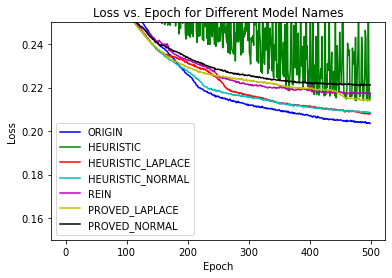

In [18]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt


data = {}

def add_data(model_name, epoch, size, loss):
    key = (model_name, epoch, size)
    value = loss
    data[key] = value

def parse_records(file_path):

    with open(file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:

        size_match = re.match(r'^size:(\d+)', line)
        epoch_match = re.match(r'^epoch:(\d+)', line)
        loss_match = re.match(r'^([A-Z_]+)loss:(\S+)$', line)

        if size_match:
            tmp_size = int(size_match.group(1))
        elif epoch_match:
            tmp_epoch = int(epoch_match.group(1))
        elif loss_match:
            tmp_name = loss_match.group(1)
            tmp_loss = float(loss_match.group(2))
            add_data(tmp_name, tmp_epoch, tmp_size, tmp_loss)


# 示例用法
file_path = 'output.txt'
parsed_records = parse_records(file_path)

# 将记录转换为DataFrame
df_data = pd.DataFrame([(key[0], key[1], key[2], value) for key, value in data.items()],
                       columns=["Model Name", "Epoch", "Size", "Loss"])

# 按照 "Model Name" 和 "Epoch" 分组，并计算平均值
#df_data = df_data.groupby(["Model Name", "Epoch"]).mean().reset_index()

# 获取不同的 "Model Name"
model_names = df_data["Model Name"].unique()

# 手动选择颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 绘制曲线图
for i, model_name in enumerate(model_names):
    model_data = df_data[(df_data["Model Name"] == model_name) & (df_data["Size"] == 21)]
    plt.plot(model_data["Epoch"], model_data["Loss"], label=model_name, color=colors[i])

# 添加图例、标签等
plt.legend()
plt.xlabel("Epoch")
plt.ylim([0.15, 0.25])
plt.ylabel("Loss")
plt.title("Loss vs. Epoch for Different Model Names")
plt.show()

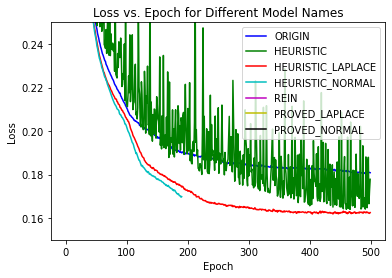

In [19]:
# 手动选择颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 绘制曲线图
for i, model_name in enumerate(model_names):
    model_data = df_data[(df_data["Model Name"] == model_name) & (df_data["Size"] == 41)]
    plt.plot(model_data["Epoch"], model_data["Loss"], label=model_name, color=colors[i])

# 添加图例、标签等
plt.legend()
plt.xlabel("Epoch")
plt.ylim([0.15, 0.25])
plt.ylabel("Loss")
plt.title("Loss vs. Epoch for Different Model Names")
plt.show()

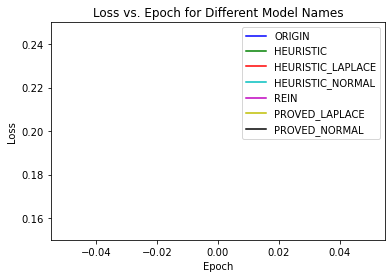

In [20]:
# 手动选择颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 绘制曲线图
for i, model_name in enumerate(model_names):
    model_data = df_data[(df_data["Model Name"] == model_name) & (df_data["Size"] == 61)]
    plt.plot(model_data["Epoch"], model_data["Loss"], label=model_name, color=colors[i])

# 添加图例、标签等
plt.legend()
plt.xlabel("Epoch")
plt.ylim([0.15, 0.25])
plt.ylabel("Loss")
plt.title("Loss vs. Epoch for Different Model Names")
plt.show()

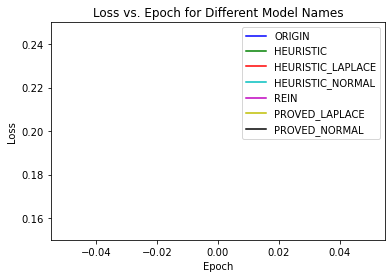

In [21]:
# 手动选择颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 绘制曲线图
for i, model_name in enumerate(model_names):
    model_data = df_data[(df_data["Model Name"] == model_name) & (df_data["Size"] == 81)]
    plt.plot(model_data["Epoch"], model_data["Loss"], label=model_name, color=colors[i])

# 添加图例、标签等
plt.legend()
plt.xlabel("Epoch")
plt.ylim([0.15, 0.25])
plt.ylabel("Loss")
plt.title("Loss vs. Epoch for Different Model Names")
plt.show()

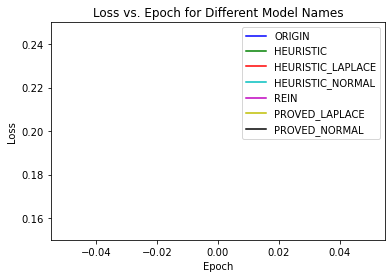

In [22]:
# 手动选择颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 绘制曲线图
for i, model_name in enumerate(model_names):
    model_data = df_data[(df_data["Model Name"] == model_name) & (df_data["Size"] == 101)]
    plt.plot(model_data["Epoch"], model_data["Loss"], label=model_name, color=colors[i])

# 添加图例、标签等
plt.legend()
plt.xlabel("Epoch")
plt.ylim([0.15, 0.25])
plt.ylabel("Loss")
plt.title("Loss vs. Epoch for Different Model Names")
plt.show()

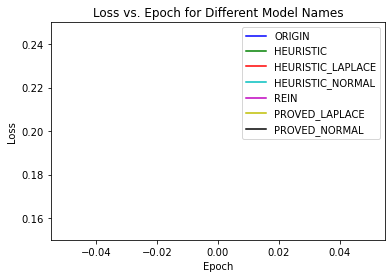

In [23]:
# 手动选择颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 绘制曲线图
for i, model_name in enumerate(model_names):
    model_data = df_data[(df_data["Model Name"] == model_name) & (df_data["Size"] == 121)]
    plt.plot(model_data["Epoch"], model_data["Loss"], label=model_name, color=colors[i])

# 添加图例、标签等
plt.legend()
plt.xlabel("Epoch")
plt.ylim([0.15, 0.25])
plt.ylabel("Loss")
plt.title("Loss vs. Epoch for Different Model Names")
plt.show()

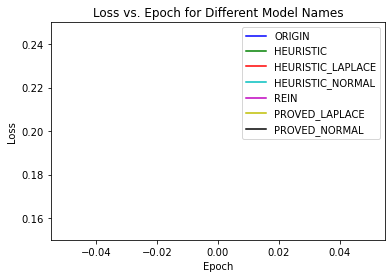

In [24]:
# 手动选择颜色
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# 绘制曲线图
for i, model_name in enumerate(model_names):
    model_data = df_data[(df_data["Model Name"] == model_name) & (df_data["Size"] == 141)]
    plt.plot(model_data["Epoch"], model_data["Loss"], label=model_name, color=colors[i])

# 添加图例、标签等
plt.legend()
plt.xlabel("Epoch")
plt.ylim([0.15, 0.25])
plt.ylabel("Loss")
plt.title("Loss vs. Epoch for Different Model Names")
plt.show()

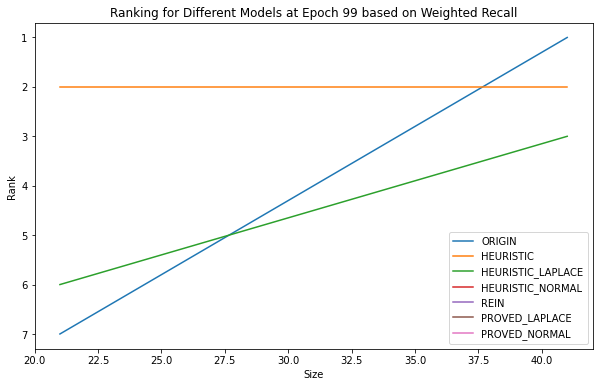

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建包含Epoch为99的数据的DataFrame
specific_epoch_data = df_data[df_data["Epoch"] == 499]

# 初始化一个字典，用于保存每个size的排序结果
size_ranking_dict = {}

# 遍历每个size
for size in specific_epoch_data["Size"].unique():
    # 获取当前size的数据
    size_data = specific_epoch_data[specific_epoch_data["Size"] == size]
    
    # 对当前size的数据按weighted_recall进行排序
    size_data_sorted = size_data.sort_values(by="Loss", ascending=False)
    
    # 为每个model分配排名
    size_data_sorted["Rank"] = range(1, len(size_data_sorted) + 1)
    
    # 存储排序结果
    size_ranking_dict[size] = size_data_sorted

# 绘制折线图
plt.figure(figsize=(10, 6))
for model_name in df_data["Model Name"].unique():
    model_data = pd.concat([size_ranking_dict[size][size_ranking_dict[size]["Model Name"] == model_name] for size in size_ranking_dict], ignore_index=True)
    plt.plot(model_data["Size"], model_data["Rank"], label=model_name)

# 添加图例、标签等
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Size")
plt.ylabel("Rank")
plt.title("Ranking for Different Models at Epoch 99 based on Weighted Recall")
plt.show()
